In [6]:
import numpy as np
import random

def sigmoide(z):
    """La fonction d'activation sigmoide"""
    return 1.0/(1.0+np.exp(-z))

def sigmoide_derivee(z):
    """Derivative of the sigmoid function."""
    return sigmoide(z)*(1-sigmoide(z))

class RNA(object):

    def __init__(self, nc):
        """ nc[c] contient le nombre de neurones de la couche c, c = 0 ...nombre_couches-1
        la couche d'indice 0 est la couche d'entrée
        w[c] est la marice des poids entre la couche c et c+1
        w[c][i,j] est le poids entre le neuronne i de la couche c et j de la couche c+1
        i = 0 correspond au biais par convention
        les poids sont initialisés avec un nombre aléatoire selon une distribution N(0,1)
        """
        self.nombre_couches = len(nc)
        self.nc = nc
        np.random.seed(42)
        self.w = [np.random.randn(x+1, y) for x, y in zip(nc[:-1], nc[1:])]
        print("nc:",nc)
        print("zip(nc[:-1], nc[1:])",zip(nc[:-1], nc[1:]))
        print("w:",self.w)

    def propagation_avant(self, a):
        """a est un vecteur d'activation. a[0]=1 correspond au biais"""
        for wc in self.w:
            a = np.vstack((np.ones(1),sigmoide(np.dot(wc.transpose(), a))))
        return a

    def SGD(self, donnees_entrainement_x, donnees_entrainement_y, epochs, taille_mini_batch, eta,
            donnees_test_x, donnees_test_y):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``donnees_entrainement`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``donnees_test`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        n = len(donnees_entrainement_x)
        donnees_entrainement=[(donnees_entrainement_x[i],donnees_entrainement_y[i]) for i in range(n)]
        n_test = len(donnees_test_x)
        donnees_test=[(donnees_test_x[i],donnees_test_y[i]) for i in range(n_test)]

        for j in range(epochs):
            random.shuffle(donnees_entrainement)
            mini_batches = [
                donnees_entrainement[k:k+taille_mini_batch]
                for k in range(0, n, taille_mini_batch)]
            for mini_batch in mini_batches:
                self.mini_batch(mini_batch, eta)
            print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(donnees_test), n_test))

    def mini_batch(self, mini_batch, eta):
        """Update the network's w and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_w = [np.zeros(w.shape) for w in self.w]
        for x, y in mini_batch:
            delta_nabla_w = self.retropropagation(x, y)
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.w = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.w, nabla_w)]

    def retropropagation(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.w``."""
        # print(x,y)
        # print(type(x))
        # print(type(y))
        nabla_w = [np.zeros(wc.shape) for wc in self.w]
        # propagation avant avec stockage des activations[0] est à 1 pour les biais
        activation = np.vstack((np.ones(1),x.reshape(x.size,1))) # activation
        activations = [np.vstack((np.ones(1),x.reshape(x.size,1)))] # liste des activations couche par couche
        zs = [] # # liste des z couche par couche

        for wc in self.w:
            z = np.dot(wc.transpose(), activation)
            zs.append(z)
            activation = np.vstack((np.ones(1),sigmoide(z))) 
            activations.append(activation)
        # print("zs:",zs)
        # print("activations:",activations)
        
        # rétropropagation 
        # delta est le vecteur des dérivées par rapport zjc-1
        # calcul de la dérivée par rapport a z pour la couche de sortie
        delta = derivee_cout(activations[-1][1:], y) * sigmoide_derivee(zs[-1])
        nabla_w[-1] = np.dot(activations[-2],delta.transpose())
        # print("del w couche[2]:",nabla_w[-1])

        for l in range(2, self.nombre_couches):
            z = zs[-l]
            sp = sigmoide_derivee(z)
            delta = np.dot(self.w[-l+1], delta)[1:] * sp
            # print("z:",z)
            # print("sp:",sp)
            # print("delta:",delta)
            # print("activations:",activations)
            # print("l:",l)
            # print("activations[-l-1]:",activations[-l-1])
            nabla_w[-l] = np.dot(activations[-l-1],delta.transpose())
        return nabla_w

    
    def evaluate(self, donnees_test):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        resultats = [(np.argmax(self.propagation_avant(np.vstack((np.ones(1),x.reshape(x.size,1))))), y)
                        for (x, y) in donnees_test]
        print("somme des carres:",sum((x-y)**2 for (x, y) in resultats))
        return sum((x-y)**2 for (x, y) in resultats)

def derivee_cout(output_activations, y):
    """ Vecteur des dérivées de la fonction de cout vs aj"""
    return (output_activations-y)

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


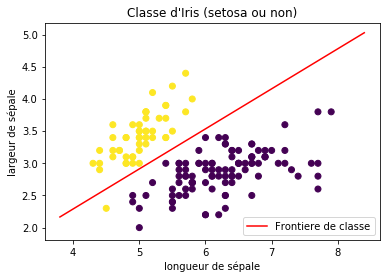

Métrique d'évaluation:
0.9933333333333333


In [7]:
# Régression logistique à partir de la collection Iris
# X: longueur et largeur de sépale, y: setosa ou non

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

# Charger les données
iris = datasets.load_iris()
iris_X = iris.data[:,:2] # les deux colonnes longueur et largeur de sépale
iris_y = iris.target
iris_y_setosa = (iris_y==0).astype(np.int) # setosa ou non

# Effectuer la régression logistique
regression_logistique = LogisticRegression()
regression_logistique.fit(iris_X,iris_y_setosa)

# Afficher la frontiere de classe
x_min, x_max = iris_X[:, 0].min() - .5, iris_X[:, 0].max() + .5
y_min, y_max = iris_X[:, 1].min() - .5, iris_X[:, 1].max() + .5

theta_0 = regression_logistique.intercept_
theta_1 = regression_logistique.coef_[0,0]
theta_2 = regression_logistique.coef_[0,1]
x1_intervalle = np.array((x_min,x_max))
x2_frontiere = -((theta_1/theta_2)*x1_intervalle)-(theta_0/theta_2)
plt.plot(x1_intervalle,x2_frontiere,'-r',label = 'Frontiere de classe')

# Afficher les données, la couleur dépend de la classe d'Iris
plt.title("Classe d'Iris (setosa ou non)")
plt.xlabel('longueur de sépale')
plt.ylabel('largeur de sépale')
plt.legend(loc='lower right')
plt.scatter(iris_X[:,0],iris_X[:,1],c=iris_y_setosa)
plt.show()

print("Métrique d'évaluation:")
print(regression_logistique.score(iris_X,iris_y_setosa))

In [9]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
def diviser_ent_test(donnees, proportion):
    donnees_permutes = np.random.permutation(donnees)
    taille_test = int(len(donnees) * proportion)
    return donnees_permutes[:taille_test],donnees_permutes[taille_test:]

# Diviser les données
X_test,X_ent = diviser_ent_test(iris_X, 0.2)
Y_test,Y_ent = diviser_ent_test(iris_y_setosa, 0.2)
print("X_test:",X_test)
print("X_ent:",X_ent)
print("Y_test:",Y_test)
print("Y_ent:",Y_ent)

un_rna = RNA([2, 3, 1])
un_rna.SGD(X_ent,Y_ent, 5, 10, 1.0,X_test,Y_test)


ERROR:root:No traceback has been produced, nothing to debug.


X_test: [[6.3 2.3]
 [6.7 3.3]
 [5.8 2.7]
 [6.1 3. ]
 [6.7 3.1]
 [6.  3. ]
 [4.4 3.2]
 [5.7 4.4]
 [6.2 2.8]
 [6.7 3.1]
 [6.8 3. ]
 [5.  2. ]
 [4.8 3. ]
 [6.4 3.2]
 [5.4 3.4]
 [4.9 3.1]
 [5.7 2.5]
 [5.7 2.8]
 [4.8 3.4]
 [4.9 3.6]
 [6.4 3.1]
 [5.6 2.8]
 [6.4 2.8]
 [4.7 3.2]
 [6.3 3.3]
 [4.5 2.3]
 [7.2 3.6]
 [5.1 3.8]
 [5.4 3.9]
 [6.  2.9]]
X_ent: [[4.8 3.1]
 [5.7 3.8]
 [4.8 3. ]
 [5.6 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [5.8 2.7]
 [6.5 3. ]
 [4.4 3. ]
 [6.9 3.1]
 [6.5 3. ]
 [5.8 2.7]
 [6.5 3. ]
 [4.7 3.2]
 [5.1 2.5]
 [4.9 2.4]
 [6.2 3.4]
 [6.6 3. ]
 [6.7 2.5]
 [5.  3.4]
 [5.1 3.7]
 [5.5 2.6]
 [6.4 3.2]
 [5.6 2.5]
 [5.5 3.5]
 [6.  3.4]
 [4.6 3.6]
 [6.8 3.2]
 [5.7 2.9]
 [6.2 2.2]
 [7.1 3. ]
 [4.8 3.4]
 [6.2 2.9]
 [6.8 2.8]
 [4.6 3.4]
 [5.2 3.5]
 [5.8 2.7]
 [5.  3.6]
 [5.2 4.1]
 [5.  2.3]
 [6.9 3.2]
 [6.4 2.9]
 [5.4 3.7]
 [4.9 2.5]
 [7.7 2.8]
 [5.1 3.5]
 [7.7 3. ]
 [6.7 3.3]
 [5.6 2.9]
 [5.1 3.8]
 [5.7 3. ]
 [5.2 3.4]
 [5.  3.5]
 [7.2 3.2]
 [5.  3. ]
 [5.1 3.3]
 [7.2 3. ]
 [5.5 2.4]
 [5.7 2.6]
 [5.4